In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../bstadt/NeuroDataResource')
sys.path.append('../../bstadt/Util')
sys.path.append('../../bstadt/Quality')
sys.path.append('../../bstadt/Collman')

from CollmanAlg import CollmanAlg
from NeuroDataResource import NeuroDataResource
from Quality import compute_overlap_array, get_unique_overlap
from graphing import graph_performance

In [2]:
with open('../data/api_key.txt', 'r') as f:
    api_key = f.readline()

In [3]:
resource = NeuroDataResource('api.boss.neurodata.io',
                               api_key,
                               'collman',
                               'collman15v2',
                               [{'name': 'annotation', 'dtype': 'uint64'},
                                {'name': 'PSD95_488', 'dtype':'uint8'}])

In [4]:
z_range = [4, 14]
y_range = [1000, 3000]
x_range = [1000, 3000]

collman_alg = CollmanAlg(resource, 3.)
predictions = collman_alg.detect(z_range, y_range, x_range)
gt = resource.get_cutout('annotation', z_range, y_range, x_range).astype('uint8')

In [5]:
overlap_dict = compute_overlap_array(predictions, gt)

## Overview
When graphing quantitative performance of an algorithm, it may be useful to look at the relative frequencies rather than absolute frequencies. graph_performance() method will default to plotting in relative frequencies, but an optional parameter, absolute, which can be set to False to plot in abolute frequencies.

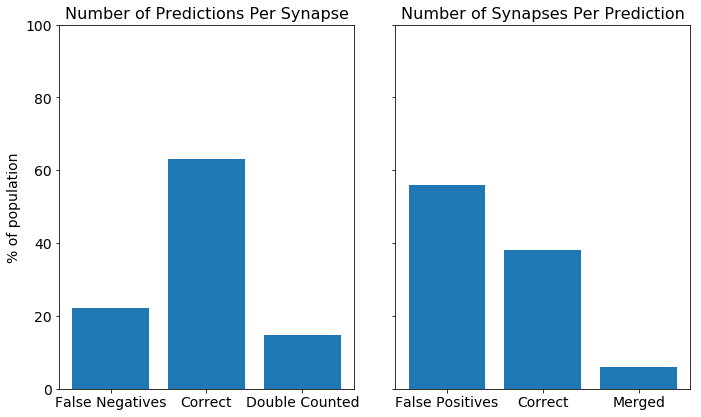

In [9]:
graph_performance([overlap_dict])

You can plot absolute values on the y axis.

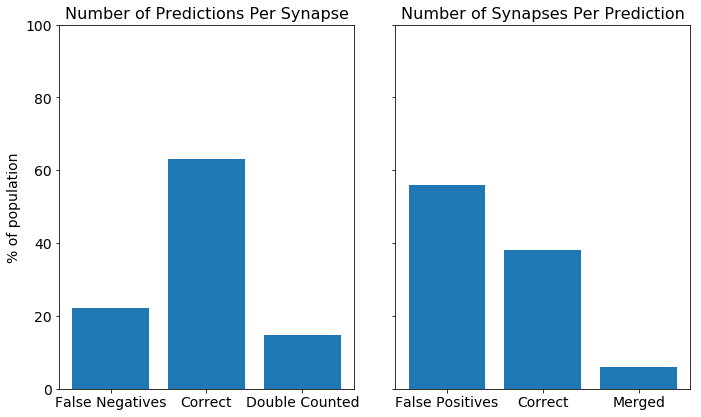

In [12]:
graph_performance([overlap_dict], absolute=False)

You can also plot multiple algorithm performances in the same plot.

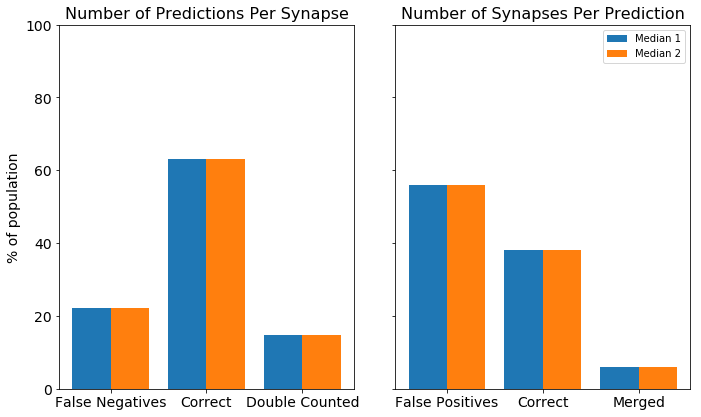

In [13]:
graph_performance([overlap_dict, overlap_dict], labels=['Median 1', 'Median 2'])

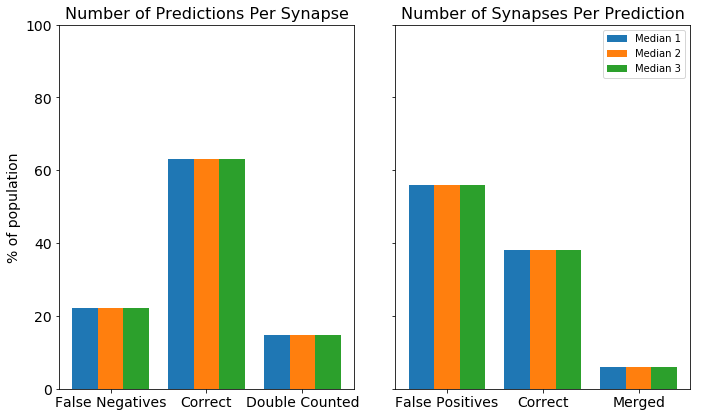

In [14]:
graph_performance([overlap_dict, overlap_dict, overlap_dict], labels=['Median 1', 'Median 2', 'Median 3'])

In [15]:
plt.close('all')